In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #visualizing data

In [4]:
df = pd.read_csv(
    r'C:\Users\Saurabh\Downloads\Diwali Sales Data.csv',
    encoding='unicode_escape'
)


In [5]:
df.shape

(11251, 15)

In [6]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [8]:
#drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [9]:
#check null
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [10]:
# drop null values
df.dropna(inplace = True)

In [11]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [12]:
df['Amount'].dtypes

dtype('int32')

In [13]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [14]:
# description of data
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [15]:
# get description of specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

Count of buyers by Gender

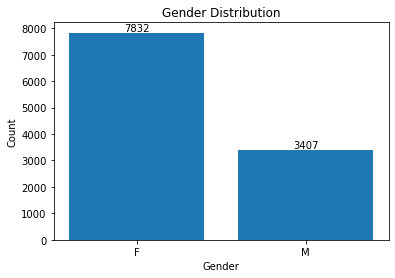

In [16]:
gender_Count= df['Gender'].value_counts()

plt.figure(figsize =(6,4))
plt.bar(gender_Count.index, gender_Count.values)
plt.xlabel("Gender")
plt.ylabel('Count')
plt.title('Gender Distribution')

#Add numbers on top of each bar
for i,v in enumerate(gender_Count.values):
    plt.text(i,v,v,ha='center', va='bottom')

### Gender Vs Total Amount

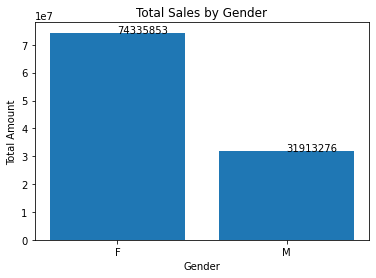

In [20]:
sales=df.groupby('Gender')['Amount'].sum()

plt.figure(figsize=(6,4))
plt.bar(sales.index, sales.values)
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.title('Total Sales by Gender')

for i,v in enumerate(sales.values):
    plt.text(i,v,v)

plt.show()

### Count of buyers by Age Group & Gender

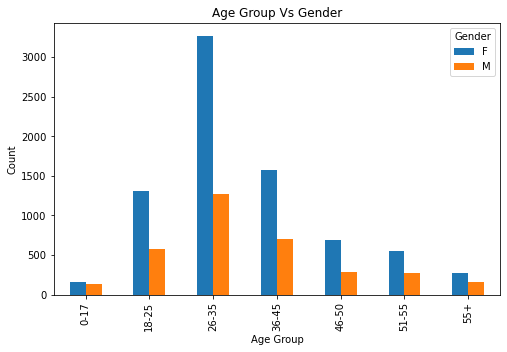

In [23]:
age_gender = df.groupby(['Age Group','Gender']).size().unstack()

age_gender.plot(kind='bar', figsize=(8,5))
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Group Vs Gender')
plt.show()

### Total Amount vs Age Group

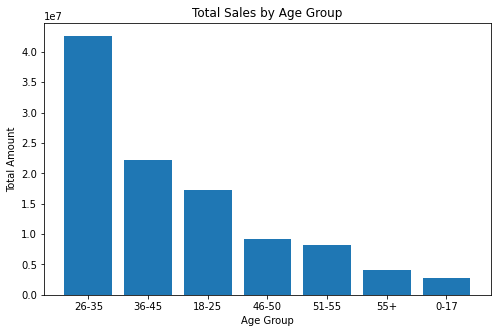

In [25]:
sales_age = df.groupby('Age Group')['Amount'].sum().sort_values(ascending=False) 
plt.figure(figsize=(8,5)) 
plt.bar(sales_age.index, sales_age.values) 
plt.xlabel('Age Group') 
plt.ylabel('Total Amount') 
plt.title('Total Sales by Age Group') 
plt.show()

# State

### Top 10 states by Orders 

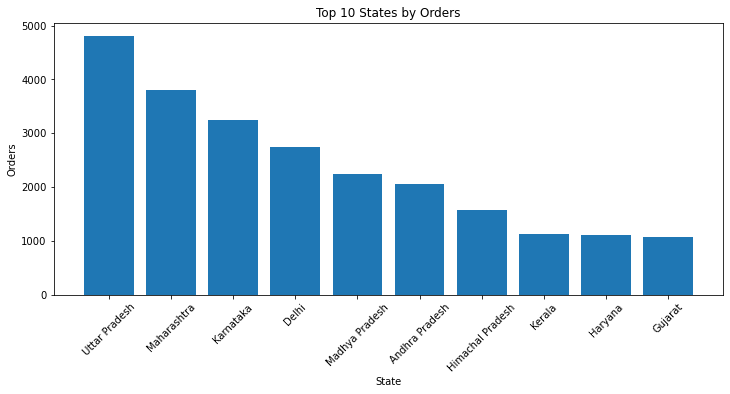

In [26]:
sales_state_orders = df.groupby('State')['Orders'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,5))
plt.bar(sales_state_orders.index, sales_state_orders.values)
plt.xlabel('State') 
plt.ylabel('Orders') 
plt.title('Top 10 States by Orders') 
plt.xticks(rotation=45) 
plt.show()


### Top 10 states by Amount 

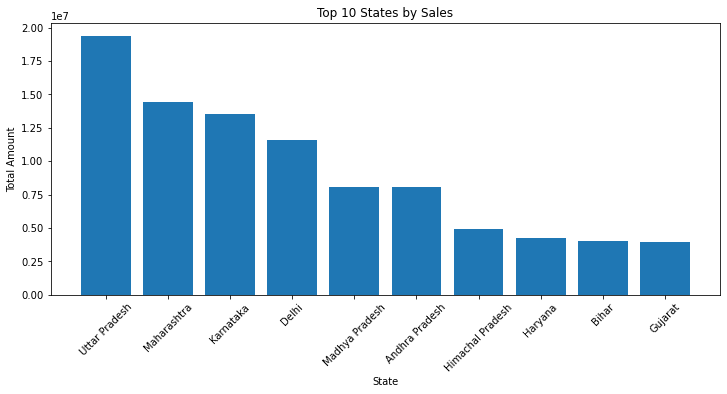

In [27]:
sales_state_amount = df.groupby('State')['Amount'].sum().sort_values(ascending=False).head(10) 
plt.figure(figsize=(12,5)) 
plt.bar(sales_state_amount.index, sales_state_amount.values) 
plt.xlabel('State')
plt.ylabel('Total Amount') 
plt.title('Top 10 States by Sales')
plt.xticks(rotation=45) 
plt.show()

# Marital Status

### Buyer count by Marital Status 

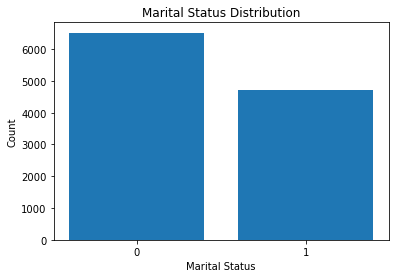

In [28]:
marital_counts = df['Marital_Status'].value_counts() 
plt.figure(figsize=(6,4))
plt.bar(marital_counts.index.astype(str), marital_counts.values)
plt.xlabel('Marital Status')
plt.ylabel('Count') 
plt.title('Marital Status Distribution') 
plt.show()

### Marital Status vs Amount (Gender-wise) 

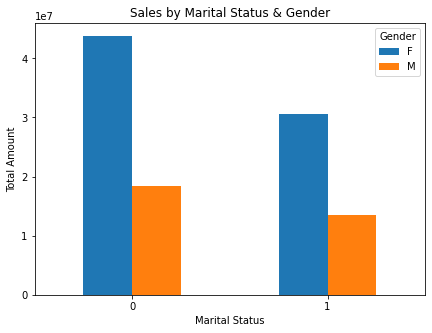

In [31]:
marital_sales = df.groupby(['Marital_Status', 'Gender'])['Amount'].sum().unstack()
marital_sales.plot(kind='bar', figsize=(7,5)) 
plt.xlabel('Marital Status')
plt.ylabel('Total Amount') 
plt.title('Sales by Marital Status & Gender')
plt.xticks(rotation=0)
plt.show()

# Occupation

### Count of buyers by Occupation 

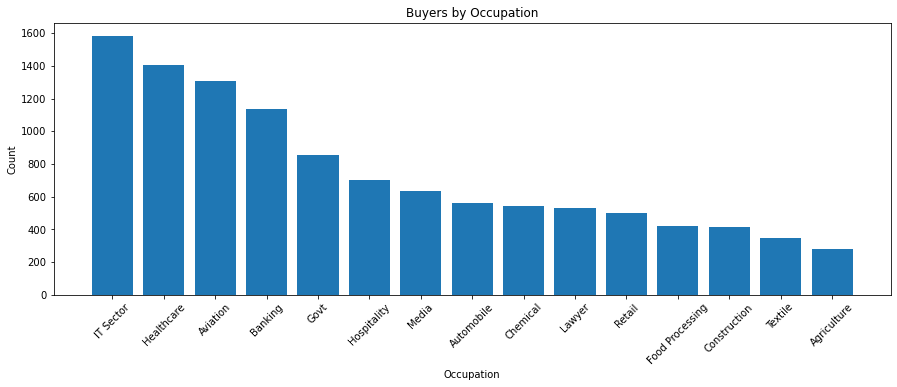

In [33]:
occupation_counts = df['Occupation'].value_counts() 
plt.figure(figsize=(15,5)) 
plt.bar(occupation_counts.index, occupation_counts.values) 
plt.xlabel('Occupation')
plt.ylabel('Count') 
plt.title('Buyers by Occupation')
plt.xticks(rotation=45) 
plt.show()

### Occupation vs Total Amount 

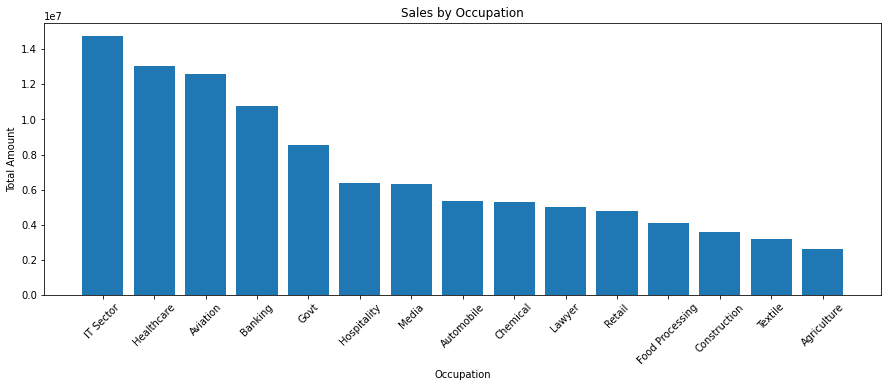

In [34]:
occupation_sales = df.groupby('Occupation')['Amount'].sum().sort_values(ascending=False) 
plt.figure(figsize=(15,5)) 
plt.bar(occupation_sales.index, occupation_sales.values)
plt.xlabel('Occupation') 
plt.ylabel('Total Amount') 
plt.title('Sales by Occupation') 
plt.xticks(rotation=45)
plt.show()

### Product Category 
### Count by Product Category

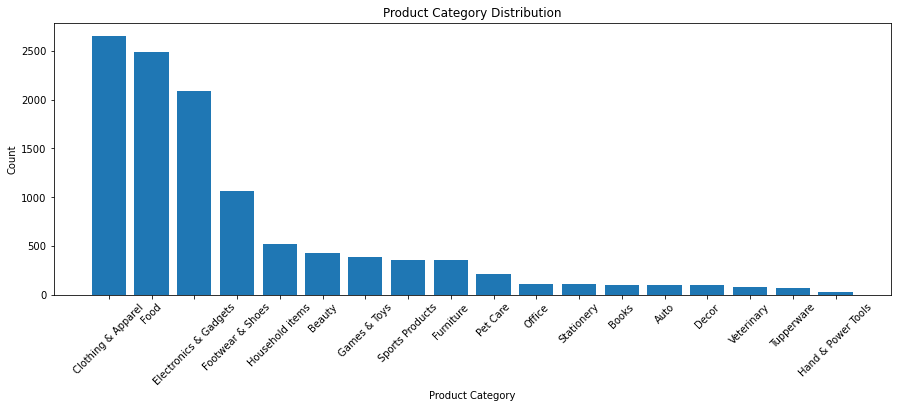

In [36]:
product_counts = df['Product_Category'].value_counts() 
plt.figure(figsize=(15,5))
plt.bar(product_counts.index, product_counts.values)
plt.xlabel('Product Category') 
plt.ylabel('Count')
plt.title('Product Category Distribution')
plt.xticks(rotation=45) 
plt.show()

### Top 10 Products by Orders 

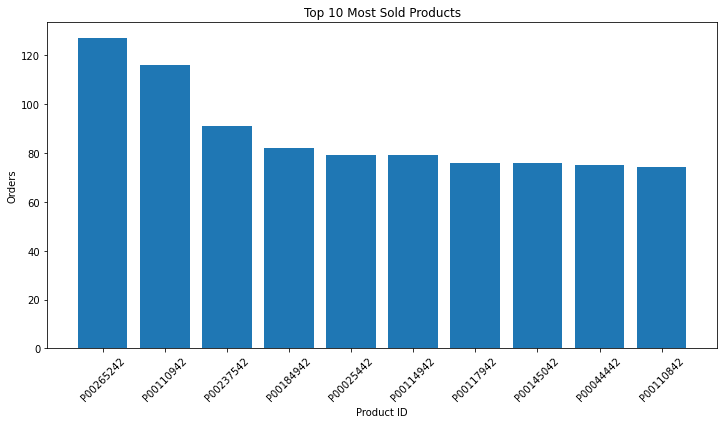

In [37]:
top_products = df.groupby('Product_ID')['Orders'].sum().nlargest(10) 
plt.figure(figsize=(12,6))
plt.bar(top_products.index.astype(str), top_products.values) 
plt.xlabel('Product ID')
plt.ylabel('Orders') 
plt.title('Top 10 Most Sold Products') 
plt.xticks(rotation=45)
plt.show()

# Conclusion

The analysis revealed that female customers contribute the highest share of total sales, indicating stronger purchasing power compared to male customers. Among all age groups, customers aged 26–35 years, particularly females, emerged as the most active and high-value buyers.

State-wise analysis showed that Uttar Pradesh, Maharashtra, and Karnataka are the top-performing regions in terms of both order volume and total revenue, making them key markets for business growth. Additionally, married customers—especially married women—demonstrate higher spending behavior compared to unmarried customers.

From an occupational perspective, customers working in IT, Healthcare, and Aviation sectors contribute the most to overall sales, suggesting higher disposable income within these professions. Product-level analysis identified Food, Clothing, and Electronics as the dominant categories driving revenue, while a small set of products accounts for a large portion of total orders.